In [4]:
suppressMessages({
    library(SummarizedExperiment)
    library(DESeq2)
    library(tidyverse)
    library(cowplot)
    library(ExploreModelMatrix)
    library(ComplexHeatmap)
})

In [2]:
counts = read.csv("combined.csv", row.names = 1)

In [15]:
sample_info = read.csv("poly_a_sample_list_duplicate.csv", row.names = 1)

In [17]:
sample_info

,Gender,Ethnicity,Condition
,<chr>,<chr>,<chr>
HS_299,F,Caucasian,HS
HS_644,UNKOWN,UNKOWN,UNKOWN
HS_672,F,Caucasian,HS
HS_678,M,African American,HS
HS_694,F,African American,HS
HS_696,F,African American,HS
HS_698,F,African American,HS
HS_701,F,Caucasian,HS
HS_702,F,Caucasian,HS


In [18]:
sample_info$Globin <- grepl("a$", row.names(sample_info))

In [19]:
rownames(sample_info)

[1] "HS_299"   "HS_644"   "HS_672"   "HS_678"   "HS_694"   "HS_696"  
 [7] "HS_698"   "HS_701"   "HS_702"   "HS_703"   "HS_299_a" "HS_644_a"
[13] "HS_672_a" "HS_678_a" "HS_694_a" "HS_696_a" "HS_698_a" "HS_701_a"
[19] "HS_702_a" "HS_703_a"

In [21]:
sample_info

,Gender,Ethnicity,Condition,Globin
,<chr>,<chr>,<chr>,<lgl>
HS_299,F,Caucasian,HS,FALSE
HS_644,UNKOWN,UNKOWN,UNKOWN,FALSE
HS_672,F,Caucasian,HS,FALSE
HS_678,M,African American,HS,FALSE
HS_694,F,African American,HS,FALSE
HS_696,F,African American,HS,FALSE
HS_698,F,African American,HS,FALSE
HS_701,F,Caucasian,HS,FALSE
HS_702,F,Caucasian,HS,FALSE


In [23]:
index <- match(colnames(counts), rownames(sample_info))
sample_info = sample_info[index,]

In [24]:
se <- SummarizedExperiment(assays = list(counts = as.matrix(counts)),
                           colData = sample_info)

In [ ]:
rowData(se)["gene_id"] = row.names(rowData(se))
rowData(se)$gene_id_reduced <- sub("\\..*", "", rowData(se)$gene_id)
row.names(se) = rowData(se)[["gene_id_reduced"]]

In [31]:
grch_symbols = read.csv("symbols.csv", row.names = 1)
common_indices <- intersect(rownames(rowData(se)), rownames(grch_symbols))

rowData(se)[common_indices,"symbol"] = grch_symbols[common_indices,"symbol"]

In [35]:
colData(se)["Patient"] = substr(row.names(colData(se)), 1, 6)

In [50]:
colData(se)$Patient = as.factor(colData(se)$Patient)
colData(se)$Globin = as.factor(colData(se)$Globin)

In [43]:
length(levels(colData(se)$Patient))

[1] 10

In [51]:
levels(colData(se)$Globin)

[1] "FALSE" "TRUE"

In [52]:
colData(se)

DataFrame with 20 rows and 5 columns
              Gender        Ethnicity   Condition   Globin  Patient
         <character>      <character> <character> <factor> <factor>
HS_299_a           F        Caucasian          HS     TRUE   HS_299
HS_644_a      UNKOWN           UNKOWN      UNKOWN     TRUE   HS_644
HS_672_a           F        Caucasian          HS     TRUE   HS_672
HS_678_a           M African American          HS     TRUE   HS_678
HS_694_a           F African American          HS     TRUE   HS_694
...              ...              ...         ...      ...      ...
HS_696             F African American          HS    FALSE   HS_696
HS_698             F African American          HS    FALSE   HS_698
HS_701             F        Caucasian          HS    FALSE   HS_701
HS_702             F        Caucasian          HS    FALSE   HS_702
HS_703             F        Caucasian          HS    FALSE   HS_703

In [70]:
row.names(se) = rowData(se)$symbol

In [73]:
rowData(se)

DataFrame with 63140 rows and 3 columns
                          gene_id gene_id_reduced          symbol
                      <character>     <character>     <character>
DDX11L2         ENSG00000290825.1 ENSG00000290825         DDX11L2
DDX11L1         ENSG00000223972.6 ENSG00000223972         DDX11L1
WASH7P          ENSG00000227232.6 ENSG00000227232          WASH7P
MIR6859-1       ENSG00000278267.1 ENSG00000278267       MIR6859-1
MIR1302-2HG     ENSG00000243485.5 ENSG00000243485     MIR1302-2HG
...                           ...             ...             ...
ENSG00000276017 ENSG00000276017.1 ENSG00000276017 ENSG00000276017
ENSG00000278817 ENSG00000278817.1 ENSG00000278817 ENSG00000278817
ENSG00000277196 ENSG00000277196.4 ENSG00000277196 ENSG00000277196
U6              ENSG00000278625.1 ENSG00000278625              U6
U1              ENSG00000277374.1 ENSG00000277374              U1

In [74]:
dds <- DESeqDataSet(se, design = ~ Globin + Patient)

Warning message in DESeqDataSet(se, design = ~Globin + Patient):
"1630 duplicate rownames were renamed by adding numbers"


gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



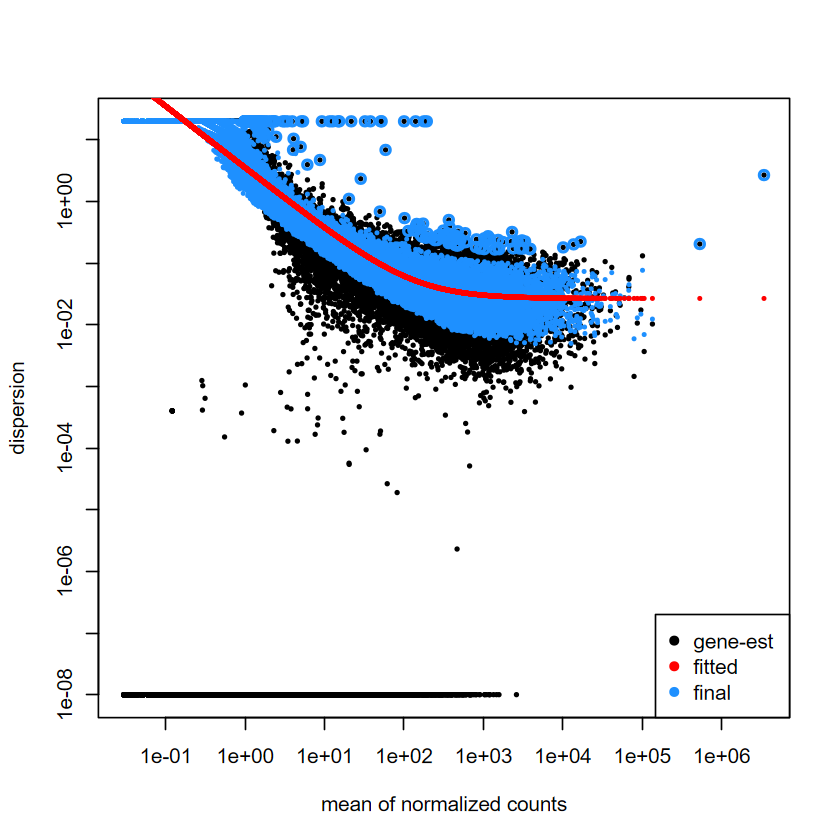

In [75]:
dds <- estimateSizeFactors(dds)

# Estimate dispersion parameter for negative binomial distribution
dds <- estimateDispersions(dds)
plotDispEsts(dds)
dds <- nbinomWaldTest(dds, maxit = 100)

In [76]:
res <- results(dds, contrast = c('Globin', 'TRUE', 'FALSE'))

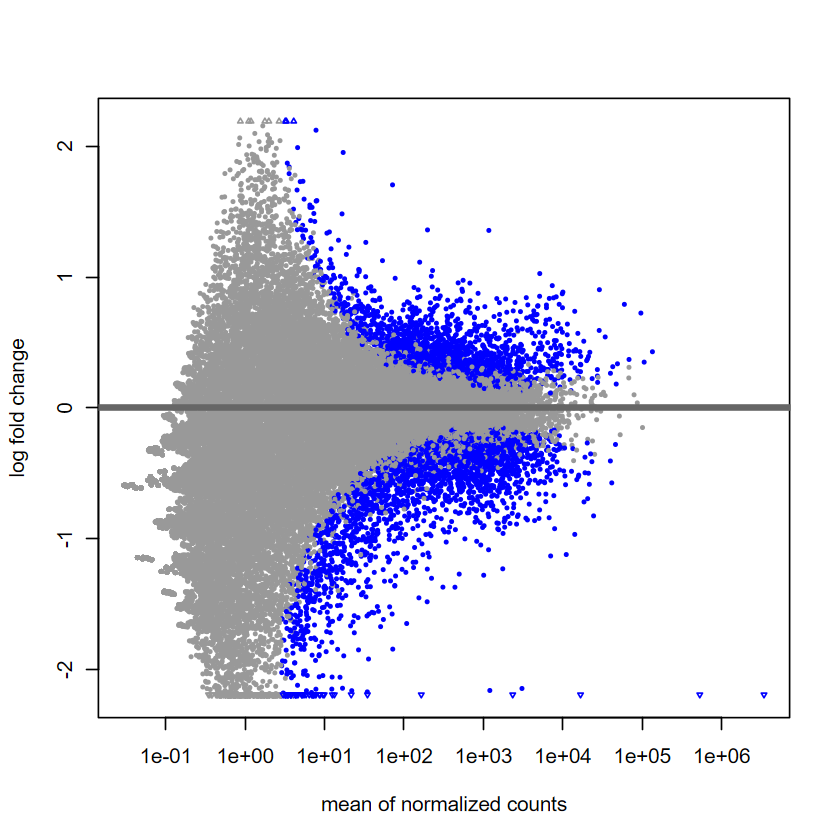

In [ ]:
plotMA(res)

In [9]:
res_ordered = res[order(res$padj),]



library(openxlsx)

write.csv(res_ordered, file = "resordered.csv")

In [10]:
res_ordered

log2 fold change (MLE): Globin TRUE vs FALSE 
Wald test p-value: Globin TRUE vs FALSE 
DataFrame with 63140 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat       pvalue
                <numeric>      <numeric> <numeric> <numeric>    <numeric>
HBA2            532555.41      -11.11641  0.292547  -37.9988  0.00000e+00
HBD               2348.63       -6.19859  0.175800  -35.2594 2.46664e-272
HBA1             16787.23      -12.50996  0.368488  -33.9495 1.24261e-252
TAF15             1209.66       -2.15685  0.159812  -13.4961  1.64847e-41
ANKDD1A            197.44       -1.23024  0.106780  -11.5212  1.03109e-30
...                   ...            ...       ...       ...          ...
ENSG00000278573 0.0000000             NA        NA        NA           NA
ENSG00000276017 0.0000000             NA        NA        NA           NA
ENSG00000277196 1.4956162      -0.247245   1.03158 -0.239676     0.810581
U6.36           0.0329482      -0.599850   3.02545 -0.19826

log2 fold change (MLE): Globin TRUE vs FALSE 
Wald test p-value: Globin TRUE vs FALSE 
DataFrame with 20395 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
DDX11L2           8.44904      0.2315818  0.473891  0.488681  0.625067
WASH7P          299.66512      0.1477624  0.168168  0.878662  0.379585
MIR6859-1         7.34632      0.6227225  0.477483  1.304178  0.192173
ENSG00000238009  11.59363      0.0766070  0.436462  0.175518  0.860673
CICP27           87.19698      0.0566353  0.175167  0.323321  0.746452
...                   ...            ...       ...       ...       ...
ENSG00000276345  28.62804      -1.120373  1.150200 -0.974068  0.330023
ENSG00000277856  17.85352       0.318627  0.291520  1.092987  0.274399
ENSG00000275063  50.95893       0.246676  0.226362  1.089739  0.275828
ENSG00000278673   4.91069       0.190625  0.591625  0.322205  0.747297
ENSG00000278817   3.5

In [25]:
res_omit = na.omit(res)
res_filtered <- res_omit[res_omit$log2FoldChange > 0,]

# filter out the novel transcriptomes
res_filtered <- res_filtered[!grepl("^ENSG", row.names(res_filtered)), ]

In [26]:
library(EnhancedVolcano)
png("volcano_plot_globin_degs.png", width = 12, height = 8, units = "in", res = 300)

EnhancedVolcano(res_filtered,
    lab = row.names(res_filtered),
    x = 'log2FoldChange',
    y = 'padj',
    title = 'Globin Depleted DEGs',
    pCutoff = 10e-2
)

dev.off()

png 
  2

In [27]:
res_omit = na.omit(res)
res_filtered <- res_omit[-5 < res_omit$log2FoldChange & res_omit$log2FoldChange < 0,]
res_filtered <- res_filtered[!grepl("^ENSG", row.names(res_filtered)), ]

In [28]:
library(EnhancedVolcano)
png("volcano_plot_nonglobin_degs.png", width = 12, height = 8, units = "in", res = 300)

EnhancedVolcano(res_filtered,
    lab = row.names(res_filtered),
    x = 'log2FoldChange',
    y = 'padj',
    title = 'Non-Globin Depleted DEGs',
    pCutoff = 10e-2
)

dev.off()

png 
  2

In [121]:
library(ComplexHeatmap)

top_genes <- head(rownames(res_ordered), 50)
norm_counts <- counts(dds, normalized = TRUE)

# Subset the normalized counts for the top genes
top_norm_counts <- norm_counts[top_genes, ]

scaled_counts <- t(scale(t(top_norm_counts)))  # Scale by rows (genes)

col_data <- data.frame(GlobinDepletionStatus = factor(rep(c("Globin Depleted", "Non-Globin Depleted"), each = 10)))

# Define color palette for the groups
group_colors <- c("Globin Depleted" = "skyblue", "Non-Globin Depleted" = "salmon")

# Create HeatmapAnnotation
annotation <- HeatmapAnnotation(
  df = col_data,
  col = list(GlobinDepletionStatus = group_colors),
  show_annotation_name = TRUE,
  annotation_name_side = "right",
  annotation_name_gp = gpar(fontface = "bold"),
  gp = gpar(col = "black")
)

png("heatmap_plot.png", width = 8, height = 15, units = "in", res = 300)
# Create the heatmap
hm = Heatmap(scaled_counts,
        name = "Expression",
        show_row_names = TRUE,
        show_column_names = TRUE,
        cluster_rows = TRUE,   # Cluster genes
        cluster_columns = TRUE, # Cluster samples
        bottom_annotation = annotation
)

draw(hm,
   column_title="                                       Globin Depletion vs Non-Depletion Normalized Gene Expression",
   column_title_gp=grid::gpar(fontsize=16))



dev.off()

png 
  2

In [6]:
dds = readRDS("comp_dds.RDS")
res = readRDS("comp_res.RDS")

In [8]:
res

log2 fold change (MLE): Globin TRUE vs FALSE 
Wald test p-value: Globin TRUE vs FALSE 
DataFrame with 63140 rows and 6 columns
                  baseMean log2FoldChange     lfcSE       stat    pvalue
                 <numeric>      <numeric> <numeric>  <numeric> <numeric>
DDX11L2           8.449037       0.231582  0.473891  0.4886812  0.625067
DDX11L1           0.000000             NA        NA         NA        NA
WASH7P          299.665123       0.147762  0.168168  0.8786617  0.379585
MIR6859-1         7.346318       0.622722  0.477483  1.3041782  0.192173
MIR1302-2HG       0.322858      -0.108137  3.008252 -0.0359467  0.971325
...                    ...            ...       ...        ...       ...
ENSG00000276017  0.0000000             NA        NA         NA        NA
ENSG00000278817  3.5125452       0.595416  0.726505   0.819561  0.412466
ENSG00000277196  1.4956162      -0.247245  1.031580  -0.239676  0.810581
U6.36            0.0329482      -0.599850  3.025451  -0.198268  0.8428